### The following steps form the basis for any machine learning workflow once we have a problem and model in mind:

1. State the question and determine required data
2. Acquire the data in an accessible format
3. Identify and correct missing data points/anomalies as required
4. Prepare the data for the machine learning model
5. Establish a baseline model that you aim to exceed
6. Train the model on the training data
7. Make predictions on the test data
8. Compare predictions to the known test set targets and calculate performance metrics
9. If performance is not satisfactory, adjust the model, acquire more data, or try a different modeling technique
10. Interpret model and report results visually and numerically

#### link to download datatset : https://drive.google.com/file/d/1pko9oRmCllAxipZoa3aoztGZfPAD2iwj/view?usp=sharing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
raw_data = pd.read_csv('temps.csv')

In [3]:
raw_data.shape

(348, 12)

In [4]:
raw_data.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [5]:
# These are not features. These are predicted outcomes
raw_data.drop(['forecast_noaa','forecast_acc','forecast_under'],axis=1,inplace=True)

In [6]:
# Descriptive statistic for each columns
raw_data.describe()

,year,month,day,temp_2,temp_1,average,actual,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,95.000000


In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 9 columns):
year       348 non-null int64
month      348 non-null int64
day        348 non-null int64
week       348 non-null object
temp_2     348 non-null int64
temp_1     348 non-null int64
average    348 non-null float64
actual     348 non-null int64
friend     348 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 24.5+ KB


In [8]:
raw_data.month.value_counts()

12    31
7     31
5     31
3     31
1     31
11    30
10    30
6     30
4     30
9     28
2     26
8     19
Name: month, dtype: int64

In [9]:
# In August entries are less

In [10]:
raw_data.week.value_counts()

Tues     52
Fri      50
Sat      50
Wed      49
Mon      49
Sun      49
Thurs    49
Name: week, dtype: int64

In [11]:
raw_data = pd.concat([raw_data,pd.get_dummies(raw_data.week,prefix='week')],axis=1)
raw_data.head()

,year,month,day,week,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,Fri,45,45,45.6,45,29,1,0,0,0,0,0,0
1,2016,1,2,Sat,44,45,45.7,44,61,0,0,1,0,0,0,0
2,2016,1,3,Sun,45,44,45.8,41,56,0,0,0,1,0,0,0
3,2016,1,4,Mon,44,41,45.9,40,53,0,1,0,0,0,0,0
4,2016,1,5,Tues,41,40,46.0,44,41,0,0,0,0,0,1,0


In [12]:
raw_data.drop('week',axis=1,inplace=True)

## Outlier detection

Text(0.5,1,'friend')

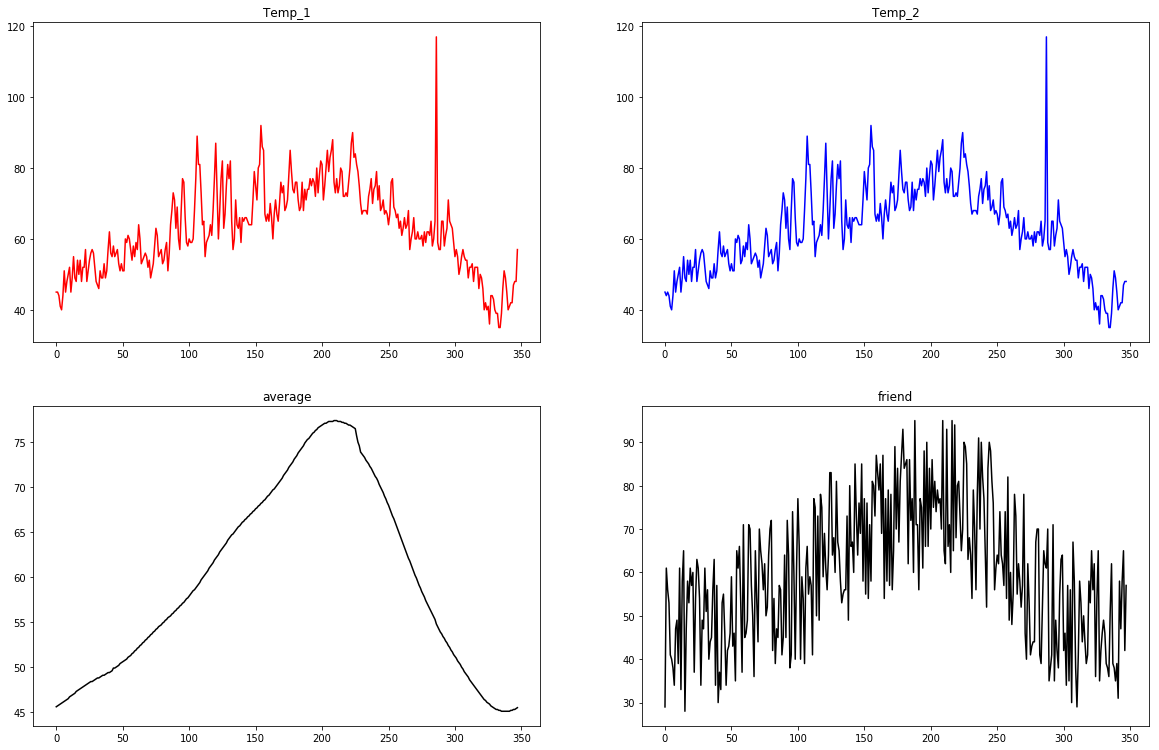

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(3,2, 1)
plt.plot(raw_data.temp_1, color='red')
plt.title("Temp_1")

plt.subplot(3,2, 2)
plt.plot(raw_data.temp_2, color='blue')
plt.title("Temp_2")

plt.subplot(3,2, 3)
plt.plot(raw_data.average, color='black')
plt.title("average")

plt.subplot(3,2, 4)
plt.plot(raw_data.friend, color='black')
plt.title("friend")

In [14]:
print(raw_data[raw_data.temp_1>100].index.tolist())
print(raw_data[raw_data.temp_2>100].index.tolist())

[286]
[287]


In [15]:
# drop outliers 
raw_data.drop(index=[286,287],inplace=True)

In [16]:
# Seperating labels from datasets
raw_label = raw_data.actual
del raw_data['actual']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor

In [18]:
X_train,X_test,y_train,y_test = train_test_split(raw_data,
                                                 raw_label,
                                                 test_size=0.25,
                                                 random_state=42)

our baseline is the error we would get if we simply predicted the average max temperature for all days.

In [19]:
# The baseline predictions are the historical averages
round(np.mean(abs(X_test['average'] - y_test)),2) # in degrees

5.83

In [20]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(259, 14)
(87, 14)
(259,)
(87,)


In [21]:
model = RandomForestRegressor(n_estimators=1000 , random_state = 42)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [22]:
# Use the forest's predict method on the test data
predict = model.predict(X_test)

# Calculate the absolute errors
errors = abs(predict - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.88 degrees.


### according to dataset this error should be come to near 5.88 but it show 3.88 which is 25% more better than dataset. But it is not sufficient when the data in quantitative format

# Calculating accuracy

In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
model.score(X_test,y_test) # this score should be near to 1 {this is R^2}

Accuracy: 93.97 %.


0.836331762084538

In [24]:
features_names = X_train.columns.tolist()

In [25]:
importances = list(model.feature_importances_) # important features

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(features_names, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:15} Importance: {}'.format(*pair)) for pair in feature_importances]


Variable: temp_1          Importance: 0.6
Variable: average         Importance: 0.31
Variable: temp_2          Importance: 0.03
Variable: day             Importance: 0.02
Variable: friend          Importance: 0.02
Variable: month           Importance: 0.01
Variable: year            Importance: 0.0
Variable: week_Fri        Importance: 0.0
Variable: week_Mon        Importance: 0.0
Variable: week_Sat        Importance: 0.0
Variable: week_Sun        Importance: 0.0
Variable: week_Thurs      Importance: 0.0
Variable: week_Tues       Importance: 0.0
Variable: week_Wed        Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

#### Additionally, if we are using a different model, say a support vector machine, we could use the random forest feature importances as a kind of feature selection method.

# Train on a model with most important features only i.e temp_1 and average

In [26]:
rf_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)

rf_most_important.fit(X_train.loc[:,['temp_1','average']], y_train)

predictions = rf_most_important.predict(X_test.loc[:,['temp_1','average']])

errors = abs(predictions - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / y_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 4.46 degrees.
Accuracy: 93.02 %.


This tells us that we actually do not need all the data we collected to make accurate predictions! If we were to continue using this model, we could only collect the two variables and achieve nearly the same performance. In a production setting, we would need to weigh the decrease in accuracy versus the extra time required to obtain more information.

# Visualization

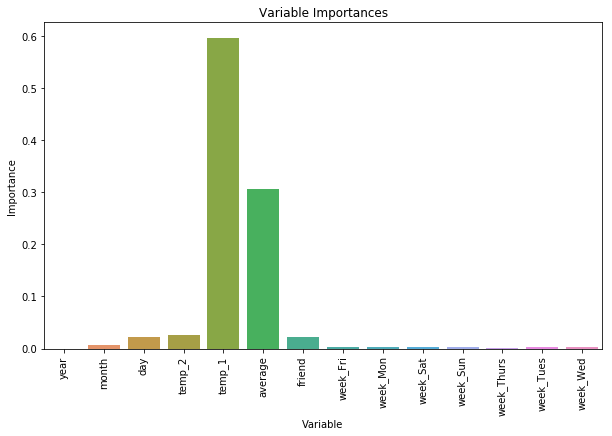

In [33]:
plt.figure(figsize=(10,6))
x_values = list(range(len(importances)))
sns.barplot(x_values, importances,orientation='vertical')
plt.xticks(x_values, features_names, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')
plt.show()